In [1]:
import urllib.request
import gzip
import shutil
import pandas as pd
import os



####Download a tick-by-tick data from Kraken Exchange through the 
####bitcoincharts.com API

####Make sure to download the csv.gz file from bitcoincharts.com before running
####the codes here

# Data Source
bitcoin_file = "krakenEUR.csv.gz"
URL = "http://api.bitcoincharts.com/v1/csv"
source_file = f"{URL}/{bitcoin_file}"

current_directory = os.getcwd() 

# Data destination on local disk
dataDir = "C:/Users/lucas/Desktop/github project"
dest_file = os.path.join(current_directory, bitcoin_file)

# Download to disk
urllib.request.urlretrieve(source_file, dest_file)

# Uncompress .gz file and read into a data frame
with gzip.open(dest_file, 'rb') as f_in:
    with open(dest_file[:-3], 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

Bitcoin = pd.read_csv(dest_file[:-3], header=None)


print(Bitcoin[:5])

# Data Management

Bitcoin.columns = ["unixtime", "price", "amount"]


print(Bitcoin[:5])

# Extract Variables
Bitcoin['time'] = pd.to_datetime(Bitcoin['unixtime'], unit='s')

# Rearrange columns for ease of reading
Bitcoin = Bitcoin[['time', 'price', 'amount']]

print(Bitcoin[:5])


# Set 'Timestamp' as the index
Bitcoin.set_index('time', inplace=True)

print(Bitcoin.head())

            0          1        2
0  1389173189  624.01000  0.20000
1  1389173198  624.01000  0.09767
2  1389173198  623.53836  0.01358
3  1389173265  623.53836  0.14896
4  1389173339  623.54066  0.20000
     unixtime      price   amount
0  1389173189  624.01000  0.20000
1  1389173198  624.01000  0.09767
2  1389173198  623.53836  0.01358
3  1389173265  623.53836  0.14896
4  1389173339  623.54066  0.20000
                 time      price   amount
0 2014-01-08 09:26:29  624.01000  0.20000
1 2014-01-08 09:26:38  624.01000  0.09767
2 2014-01-08 09:26:38  623.53836  0.01358
3 2014-01-08 09:27:45  623.53836  0.14896
4 2014-01-08 09:28:59  623.54066  0.20000
                         price   amount
time                                   
2014-01-08 09:26:29  624.01000  0.20000
2014-01-08 09:26:38  624.01000  0.09767
2014-01-08 09:26:38  623.53836  0.01358
2014-01-08 09:27:45  623.53836  0.14896
2014-01-08 09:28:59  623.54066  0.20000


In [10]:
#R provides a package called 'highfrequency', where it is easier to estimate the flat-topped kernel based RV estimator
#Therefore, it's much easier to export the dataframe and conduct the analysis in R and upload again than to formulate
#the estimator, use the rpy2 package in python that links R and Python or any other methods. 

#The data is a large set
print(Bitcoin.shape)

import gzip

Bitcoin = pd.DataFrame(Bitcoin)

# Specify the file name for the output
output_file = 'Bitcoin.csv.gz'

# Export the DataFrame to a compressed CSV file
Bitcoin.to_csv(output_file, compression='gzip', index=False)

(80740332, 2)


In [9]:
#Once the data is exported and the analysis is conducted in R, it is much easier to import the new data file here and conduct further analysis.


# It is much better to set the directory in the beginning however I kept on getting errors so I had to reset it here again
folder_path = 'C:/Users/lucas/Desktop/github project'

# 
os.chdir(folder_path)

# Read the CSV file into a Pandas DataFrame
BitcoinRV = pd.read_csv("BitcoinRV.csv")


BitcoinRV.columns = ["Time", "Realized Volatility"]

print(BitcoinRV.head())

# Convert the 'Timestamp' column to datetime
BitcoinRV['Time'] = pd.to_datetime(BitcoinRV['Time'])

                  Time  Realized Volatility
0  2014-01-08 23:39:44             0.050261
1  2014-01-09 23:59:53             0.067327
2  2014-01-10 23:59:31             0.038311
3  2014-01-11 23:59:00             0.049768
4  2014-01-12 23:57:28             0.058902


In [10]:
#To Visualize the daily price of Bitcoin. Resampling and aggeregating data into daily prices


daily_interval = Bitcoin.resample('D').last()

# Print the resulting DataFrame
print(daily_interval[:5])

                price    amount
time                           
2014-01-08  613.47231  0.150000
2014-01-09  614.22456  0.027581
2014-01-10  625.73866  0.200000
2014-01-11  653.89888  1.800000
2014-01-12  625.26660  0.010000


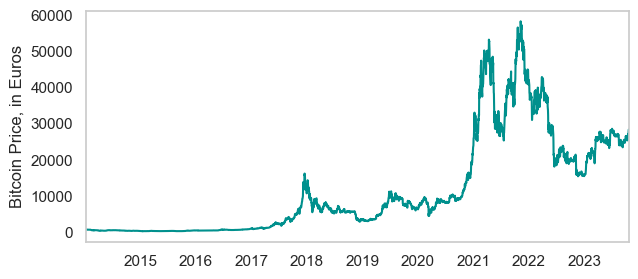

<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#For visualization, it is best to have standardized colors.

blue=(0/255, 55/255, 129/255)
darkblue = (18/255, 43/255, 84/255)
purple = (166/255, 39/255, 111/255)
darkgreen = (0/255, 144/255, 141/255)
cusom_ticks=[]


# Plotting using seaborn with custom styling
sns.set(style="whitegrid", rc={"axes.grid.axis": "y", "axes.grid": False})  
custom_colors = [blue, darkblue, darkgreen]  # Replace with standard color
plt.figure(figsize=(7, 3))
sns.lineplot(data=daily_interval['price'], color=custom_colors[2])  
plt.ylabel('Bitcoin Price, in Euros')  
plt.xlabel(None) #x-axis label is not neccessary as it is known that it is a date variable
plt.title(None)  # Title is not added here becuase a Figure number will be added in the readme.md file itself
plt.xlim(daily_interval.index[0], daily_interval.index[-1])

plt.show()

plt.savefig('2023_Bitcoin Daily Price_BTC-EUR.png')

                         price    amount  Log_Return
time                                                
2014-01-08 10:00:00  631.77777  0.079430    0.013127
2014-01-08 11:00:00  636.50000  0.937575    0.007447
2014-01-08 12:00:00  622.77700  0.060130   -0.021796
2014-01-08 13:00:00  625.00000  1.000000    0.003563
2014-01-08 14:00:00  614.77000  0.000765   -0.016503
                price    amount  Log_Return
time                                       
2014-01-10  625.73866  0.200000    0.018572
2014-01-11  653.89888  1.800000    0.044020
2014-01-12  625.26660  0.010000   -0.044775
2014-01-13  611.80000  0.027662   -0.021773
2014-01-14  609.21590  0.043030   -0.004233
                price    amount  Log_Return
time                                       
2014-01-19  612.55555  0.100000   -0.020538
2014-01-26  595.70000  0.074470   -0.027902
2014-02-02  602.56000  0.434000    0.011450
2014-02-09  507.00361  3.200971   -0.172669
2014-02-16  454.00000  2.000000   -0.110421
             

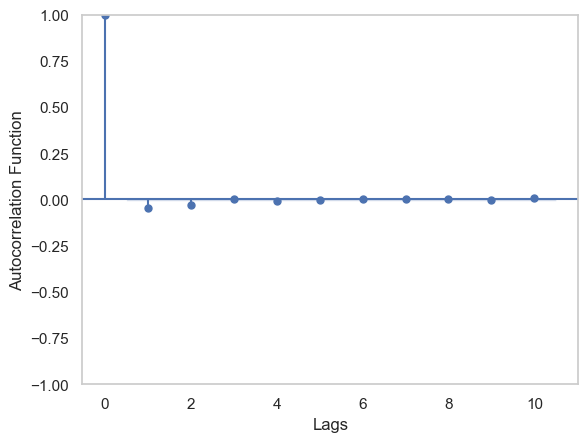

<Figure size 640x480 with 0 Axes>

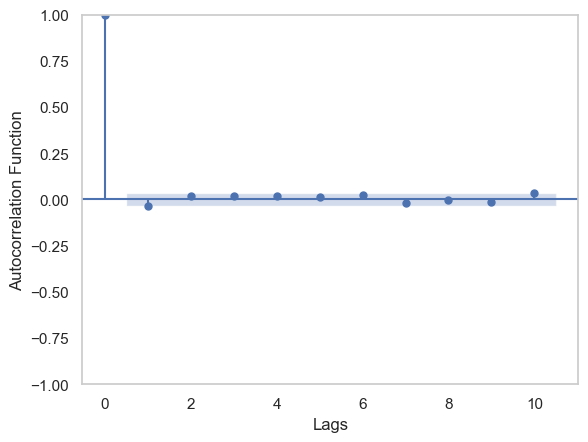

<Figure size 640x480 with 0 Axes>

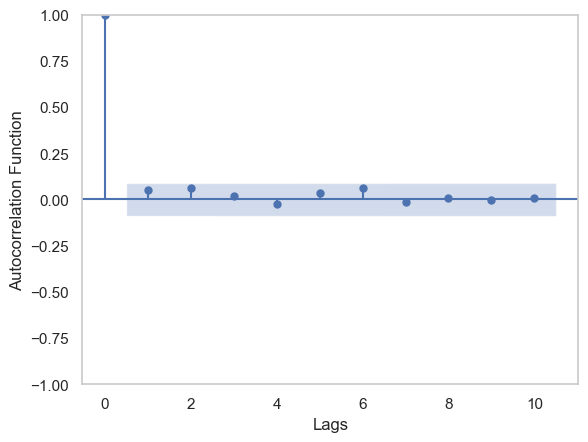

<Figure size 640x480 with 0 Axes>

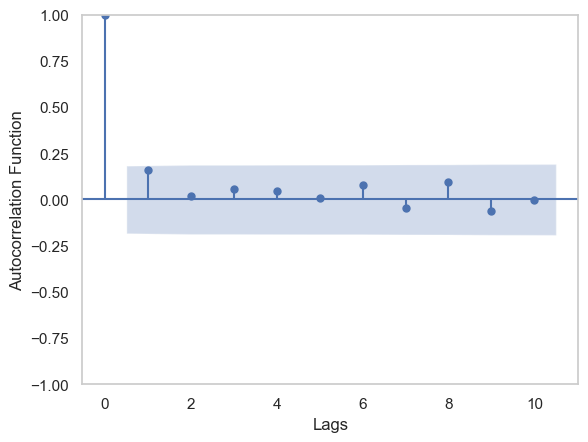

<Figure size 640x480 with 0 Axes>

In [6]:
####Stylized facts 

#Please refer to the Readme.md file for what the stylized facts are

#1 Absence of autocorrelation in the returns

from statsmodels.graphics.tsaplots import plot_acf
import numpy as np

#create an hourly interval (Aggregation)

hourly_interval = Bitcoin.resample('H').last()
hourly_interval['Log_Return'] = np.log(hourly_interval['price']).diff()
hourly_interval=hourly_interval.dropna()

print(hourly_interval.head())

#Daily interval has already been defined earlier

daily_interval['Log_Return'] = np.log(daily_interval['price']).diff()
daily_interval=daily_interval.dropna()

print(daily_interval.head())


#Create a weekly interval
weekly_interval = Bitcoin.resample('W').last()
weekly_interval['Log_Return'] = np.log(weekly_interval['price']).diff()
weekly_interval = weekly_interval.dropna()

print(weekly_interval.head())

#Create a monthly interval
monthly_interval = Bitcoin.resample('M').last()
monthly_interval['Log_Return'] = np.log(monthly_interval['price']).diff()
monthly_interval = monthly_interval.dropna()

print(monthly_interval.head())

# 
sns.set(style="whitegrid", rc={"axes.grid.axis": "y", "axes.grid": False})

# Calculate ACF and plot for hourly interval
fig, ax = plt.subplots()
plot_acf(hourly_interval['Log_Return'], lags=10, ax=ax)  
ax.set_title("")  
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation Function')
plt.show()

plt.savefig('2023_Bitcoin Hourly Autocorrelation function.png')

# Calculate ACF and plot for daily interval
fig, ax = plt.subplots()
plot_acf(daily_interval['Log_Return'], lags=10, ax=ax)  
ax.set_title("")  
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation Function')
plt.show()

plt.savefig('2023_Bitcoin Daily Autocorrelation function.png')

# Calculate ACF and plot for weekly interval
fig, ax = plt.subplots()
plot_acf(weekly_interval['Log_Return'], lags=10, ax=ax)  
ax.set_title("")  
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation Function')
plt.show()

plt.savefig('2023_Bitcoin Weekly Autocorrelation function.png')

# Calculate ACF and plot for monthly interval
fig, ax = plt.subplots()
plot_acf(monthly_interval['Log_Return'], lags=10, ax=ax)  
ax.set_title("") 
ax.set_xlabel('Lags')
ax.set_ylabel('Autocorrelation Function')
plt.show()

plt.savefig('2023_Bitcoin Monthly Autocorrelation function.png')

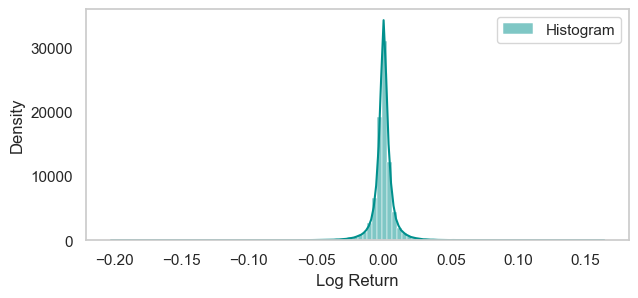

<Figure size 640x480 with 0 Axes>

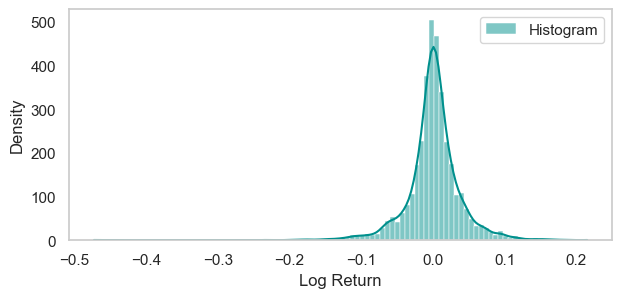

<Figure size 640x480 with 0 Axes>

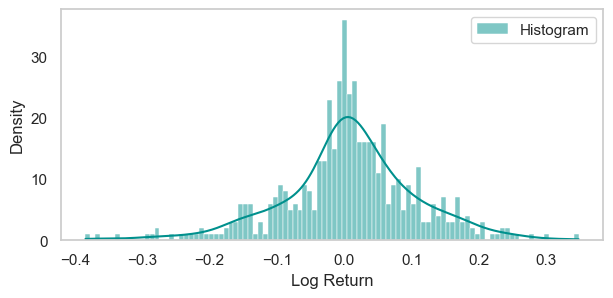

<Figure size 640x480 with 0 Axes>

In [7]:
####Stylized facts 

#Please refer to the Readme.md file for what the stylized facts are

#2 Leptokurtik
#3 Gain-Loss asymmetry
#4 Aggregational Gaussianity


# 
custom_color = darkgreen # Change this to your desired color

# Bitcoin hourly interval distribution
plt.figure(figsize=(7, 3))  
sns.histplot(hourly_interval['Log_Return'], bins=100, kde=True, color=custom_color, label='Histogram')

# 
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.title("")
plt.legend()

plt.show()
plt.savefig('2023_Bitcoin hourly interval distribution.png')

# Bitcoin daily interval distribution
plt.figure(figsize=(7, 3))  
sns.histplot(daily_interval['Log_Return'], bins=100, kde=True, color=custom_color, label='Histogram')

# 
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.title("")
plt.legend()

plt.show()
plt.savefig('2023_Bitcoin daily interval distribution.png')

# Bitcoin weekly interval distribution
plt.figure(figsize=(7, 3))  # Set the figure size
sns.histplot(weekly_interval['Log_Return'], bins=100, kde=True, color=custom_color, label='Histogram')

# 
plt.xlabel('Log Return')
plt.ylabel('Density')
plt.title("")
plt.legend()

plt.show()
plt.savefig('2023_Bitcoin weekly interval distribution.png')



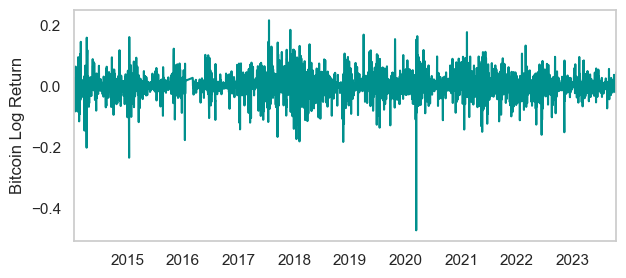

In [53]:
####Stylized facts 

#Please refer to the Readme.md file for what the stylized facts are

#5 Volatility Clustering

# 
sns.set(style="whitegrid", rc={"axes.grid.axis": "y", "axes.grid": False})
custom_colors = [darkgreen]  # Replace with standard color
plt.figure(figsize=(7, 3))
sns.lineplot(data=daily_interval['Log_Return'], color=custom_colors[0])  # Use the entire DataFrame
plt.ylabel('Bitcoin Log Return')
plt.xlabel(None)  # x-axis label is not necessary as it is a date variable
plt.title(None)  # Title is not added here because a Figure number will be added in the readme.md file itself
plt.xlim(daily_interval.index[0], daily_interval.index[-1])


plt.savefig('2023_Bitcoin_Log_Return.png')
plt.show()


                 Time  Realized Volatility
0 2014-01-08 23:39:44             0.050261
1 2014-01-09 23:59:53             0.067327
2 2014-01-10 23:59:31             0.038311
3 2014-01-11 23:59:00             0.049768
4 2014-01-12 23:57:28             0.058902


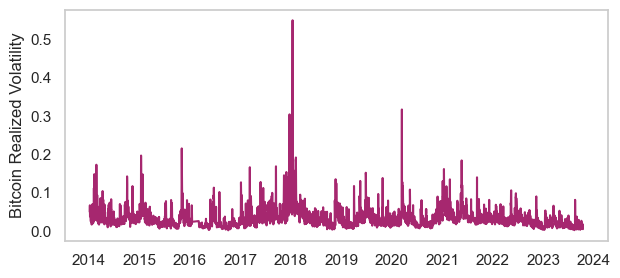

In [12]:
# Bitcoin FlatTopped Kernel Based realized Volatility

import matplotlib.dates as mdates

# Convert the 'Timestamp' column to datetime
BitcoinRV['Time'] = pd.to_datetime(BitcoinRV['Time'])

print(BitcoinRV.head())
# 
sns.set(style="whitegrid", rc={"axes.grid.axis": "y", "axes.grid": False})

# 
plt.figure(figsize=(7, 3))

# 
sns.lineplot(data=BitcoinRV, x='Time', y='Realized Volatility', color=purple)

# 
plt.ylabel('Bitcoin Realized Volatility')
plt.xlabel(None)
plt.title("", fontsize=18)

# 
years = mdates.YearLocator()
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.show()